In [89]:
import numpy as np
import pandas as pd

In [90]:
!pip3 install scikit-learn
!pip3 install rpy2

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

In [91]:
from sklearn import datasets

In [92]:
from pmm import pmm

In [59]:
# Logical Test
data = {
        'A': [1, 2, 3, 4, 5],
        'B': [5, 6, 7, 8, 9],
        'C': [np.nan, 2, 3, 4, 5]
    }
df = pd.DataFrame(data)

    # Impute missing values in column 'C' with 2 donors
imputed_df = pmm(df, 'C', donors=4)

    # Show imputed DataFrame
print("DataFrame with imputed values:")
print(imputed_df)

DataFrame with imputed values:
   A  B    C
0  1  5  5.0
1  2  6  2.0
2  3  7  3.0
3  4  8  4.0
4  5  9  5.0


/Users/oleksandrmakarevych/Library/Mobile Documents/com~apple~CloudDocs/Thesis/MICE/pmm.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_data = original_data.copy()


In [93]:
boys = pd.read_csv("boys.csv", index_col=0, header=0)
print(boys.head())
print(len(boys))

      age   hgt   wgt    bmi    hc  gen  phb  tv    reg
3   0.035  50.1  3.65  14.54  33.7  NaN  NaN NaN  south
4   0.038  53.5  3.37  11.77  35.0  NaN  NaN NaN  south
18  0.057  50.0  3.14  12.56  35.2  NaN  NaN NaN  south
23  0.060  54.5  4.27  14.37  36.7  NaN  NaN NaN  south
28  0.062  57.5  5.03  15.21  37.3  NaN  NaN NaN  south
748


In [94]:
boys.isna().sum()

age      0
hgt     20
wgt      4
bmi     21
hc      46
gen    503
phb    503
tv     522
reg      3
dtype: int64

In [62]:
import matplotlib.pyplot as plt

def plot_imputation(original_data, target_column, imputed_data, imputed_values):
    """
    Plot the imputation results.

    Parameters:
        original_data (pd.DataFrame): The original dataset with missing values.
        target_column (str): The name of the column with missing values.
        imputed_data (pd.DataFrame): The DataFrame with imputed values.
        imputed_values (pd.Series): The imputed values for plotting.
    """
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for original data
    plt.scatter(original_data['age'], original_data[target_column], color='blue', label='Observed Data', marker='o')
    
    # # Scatter plot for imputed data
    plt.scatter(original_data.loc[original_data[target_column].isna(), 'age'], imputed_values, color='red', label='Imputed Data', marker='x')
    
    # Labels and title
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.title('BMI Imputation using Predictive Mean Matching')
    plt.legend()
    
    # Show plot
    plt.show()

In [18]:
# boys[['bmi', 'age']]import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
def plot_imputation(original_data, target_column, imputed_data, imputed_values):
    original_data = boys
    target_column = "bmi"
    imputed_data = imputed_df
    imputed_values = imputed_values
    """
    Plot the imputation results.

    Parameters:
        original_data (pd.DataFrame): The original dataset with missing values.
        target_column (str): The name of the column with missing values.
        imputed_data (pd.DataFrame): The DataFrame with imputed values.
        imputed_values (pd.Series): The imputed values for plotting.
    """
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for original data
    plt.scatter(original_data['age'], original_data[target_column], color='blue', label='Observed Data', marker='o')
    
    # # Scatter plot for imputed data
    print(len(original_data.loc[original_data[target_column].isna(), 'age']))
    print(len(imputed_values))
    plt.scatter(original_data.loc[original_data[target_column].isna(), 'age'], imputed_values, color='yellow', label='Imputed Data', marker='x')
    
    # Labels and title
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.title('BMI Imputation using Predictive Mean Matching')
    plt.legend()
    
    # Show plot
    plt.show()

18
DataFrame with imputed values:
        bmi    age
3     14.54  0.035
4     11.77  0.038
18    12.56  0.057
23    14.37  0.060
28    15.21  0.062
...     ...    ...
2000  17.50  1.973
2008  15.27  1.979
2009  17.26  1.979
2018  15.92  1.990
2020  15.92  1.993

[216 rows x 2 columns]
18
18


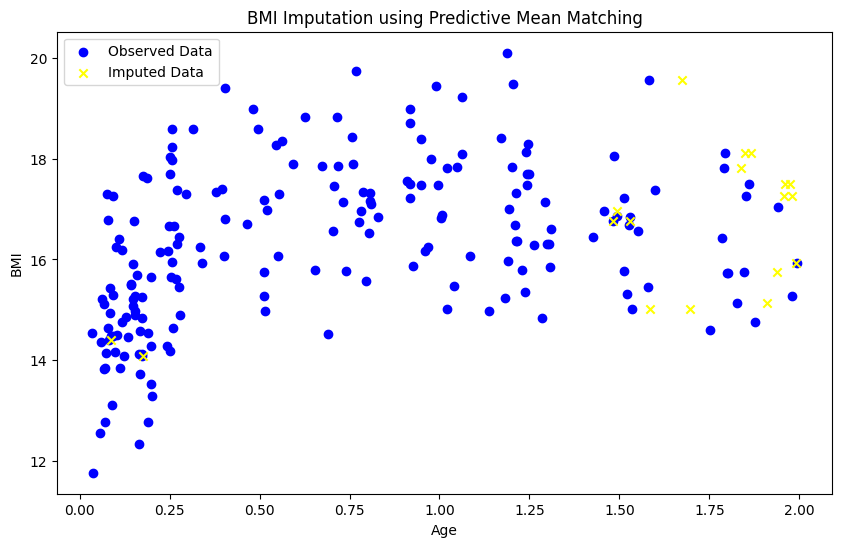

In [47]:
    # Impute missing values in column 'BMI' with 2 donors
    from pmm import  pmm
    boys = pd.read_csv("boys.csv", index_col=0, header=0)
    boys = boys.loc[boys['age'] <= 2]
    # boys['bmi'] = np.log(boys['bmi'])
    imputed_df, imputed_values = pmm(boys[['bmi', 'age']], 'bmi', donors=5)
    print(len(imputed_values))
    # Show imputed DataFrame
    print("DataFrame with imputed values:")
    print(imputed_df)

    # Plotting the imputation results
    plot_imputation(boys, 'bmi', imputed_df, imputed_values)


In [40]:
boys[['age', 'bmi']].isna()

,age,bmi
3,False,False
4,False,False
18,False,False
23,False,False
28,False,False
...,...,...
2000,False,True
2008,False,False
2009,False,True
2018,False,True


In [41]:
boys[['age', 'bmi']]

,age,bmi
3,0.035,14.54
4,0.038,11.77
18,0.057,12.56
23,0.060,14.37
28,0.062,15.21
...,...,...
2000,1.973,NaN
2008,1.979,15.27
2009,1.979,NaN
2018,1.990,NaN


In [8]:
boys = pd.read_csv("boys.csv", index_col=0, header=0)

In [9]:
boys.isna().sum()

age      0
hgt     20
wgt      4
bmi     21
hc      46
gen    503
phb    503
tv     522
reg      3
dtype: int64

In [10]:
boys[['bmi', 'age']]

,bmi,age
3,14.54,0.035
4,11.77,0.038
18,12.56,0.057
23,14.37,0.060
28,15.21,0.062
...,...,...
7418,20.48,20.429
7444,24.60,20.761
7447,20.13,20.780
7451,21.83,20.813


In [11]:
imputed_dframe, imputed_values = pmm(boys[['bmi', 'age']], target_column='bmi')

In [12]:
print(imputed_dframe)

        bmi     age
3     14.54   0.035
4     11.77   0.038
18    12.56   0.057
23    14.37   0.060
28    15.21   0.062
...     ...     ...
7418  20.48  20.429
7444  24.60  20.761
7447  20.13  20.780
7451  21.83  20.813
7475  23.14  21.177

[748 rows x 2 columns]


In [13]:
print(imputed_values)

103     14.49
366     14.84
1617    16.44
1632    18.05
1687    16.69
1739    15.01
1792    17.37
1805    17.37
1916    15.14
1927    15.14
1940    15.14
1969    17.26
1979    17.04
1990    17.04
1991    15.27
2000    15.92
2009    14.75
2018    14.75
2984    16.11
4268    16.78
7192    20.67
dtype: float64


In [4]:
import pandas as pd
import numpy as np
from pmm import pmm
data = {
        'A': [1, 2, 3, 4, 5],
        'B': [5, 6, 7, 8, 9],
        'C': [np.nan, 2, 3, 4, 5]
    }
df = pd.DataFrame(data)

    # Impute missing values in column 'C' with 2 donors
imputed_df, imputed_values = pmm(df, 'C', donors=4)

In [6]:
imputed_values

0    2.0
dtype: float64

In [88]:
len(imputed_values)

3

In [79]:
imputed_values

'age'

In [4]:
# Load Boston Housing dataset
diabetes_data = datasets.load_diabetes(as_frame=True)

In [5]:
type(diabetes_data)

sklearn.utils.Bunch

In [6]:
data = diabetes_data["data"]
feature_names = diabetes_data["feature_names"]

In [7]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

    Algorithm:
    1. Estimate a linear regression where:
        1. Y is variable to imput
        2. X is the rest of dataset
    2. We have b hat. Now we need b star
    3. Draw randomly from posterior predictive distribution and produce b star
    4. Draw randomly (using function) from Multivariate Normal Distribution where:
        1. Mean is b hat
        2. Variance is sigma squared (variance of residuals) multiplied by variance-covariance matrix of b hat
    5. Calculatye predicted values for observed and missing Y:
        1. Use b hat for observed Y
        2. Use b star for missing Y
    6. For each case where Y is missing, find 3 closest predicted values where Y is observed (from Y we predicted for observed cases)
    7. Draw randomly one of these 3 close cases and Impute missing Yi with the observed value of the close case
    Suggestions: https://statisticsglobe.com/predictive-mean-matching-imputation-method/

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
# y = 1 * x_0 + 2 * x_1 + 3
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(y)

[ 6  8  9 11]


In [76]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

1.0

In [77]:
reg.coef_

array([1., 2.])

In [78]:
reg.intercept_

3.000000000000001

In [79]:
b_hat = [reg.intercept_] + list(reg.coef_)

In [80]:
b_hat

[3.000000000000001, 1.0000000000000002, 1.9999999999999993]

In [81]:
y_true = y
y_pred = reg.predict(X)
print(y_pred, y_true)

[ 6.  8.  9. 11.] [ 6  8  9 11]


In [88]:
mean = b_hat
variance_residuals = np.var((y_true - y_pred))
var_covar = np.cov([b_hat, b_hat], rowvar=True)

In [87]:
print(var_covar)

[[1. 1.]
 [1. 1.]]


In [59]:
variance_residuals = np.var((y_true - y_pred))
var_covar = np.cov([b_hat, b_hat], rowvar=True)
total_variance = variance_residuals * var_covar

In [60]:
total_variance

array([[0., 0.],
       [0., 0.]])

In [32]:
b_hat

[1, 2, 3]

In [37]:
print([b_hat,b_hat])

[[[1, 2, 3]], [[1, 2, 3]]]


In [38]:
(b_hat, b_hat)

([[1, 2, 3]], [[1, 2, 3]])

In [41]:
print(zip(b_hat, b_hat))

In [42]:
np.array((b_hat, b_hat))

array([[[1, 2, 3]],

       [[1, 2, 3]]])

In [44]:
b_hat[0]

[1, 2, 3]

In [69]:
print([b_hat, b_hat])

[[3.000000000000001, 1.0000000000000002, 1.9999999999999993], [3.000000000000001, 1.0000000000000002, 1.9999999999999993]]


In [71]:
print([b_hat, b_hat])

[[3.000000000000001, 1.0000000000000002, 1.9999999999999993], [3.000000000000001, 1.0000000000000002, 1.9999999999999993]]


In [73]:
np.var(([b_hat, b_hat]) )

0.6666666666666671

In [99]:
np.cov(np.array([b_hat]).T)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])